# Análise de Embeddings e Redução da Dimensionalidade

**Objetivo.** Dado um conjunto de textos, gerar embeddings com BERT e investigar a estrutura dos dados via PCA, t-SNE e UMAP. Em seguida, identificar clusters e relacioná-los a categorias semânticas.

In [1]:
sentences = [
    'I swap butter for olive oil in many recipes.',
    'Canberra is the capital of Australia.',
    'Ottawa is the capital city of Canada.',
    'Paris is the most populated city in France.',
    'Tokyo is among the most populous metropolitan areas worldwide.',
    'I prefer my coffee with no sugar and a splash of milk.',
    'The recipe for pasta carbonara is simple.',
    'A pinch of salt enhances sweetness in desserts.',
    'Alignment techniques reduce harmful outputs.',
    'Explainable AI highlights salient features for decisions.',
    'Transformer models enable long-range language dependencies.',
    'Black swan events stress-test portfolio resilience.',
    'The Sahara Desert spans much of North Africa.',
    'Inflation erodes real purchasing power of cash.',
    'Aromatics like garlic and onion build flavor early.',
    'Value stocks trade at lower multiples relative to fundamentals.',
    'Quantization reduces memory with minimal accuracy loss.',
    'Tax-loss harvesting offsets capital gains.',
    'Investing in technology can be risky.',
    'Fermented foods add acidity and complexity.',
    'Marinating tofu improves texture and taste.',
    'Vector databases power semantic search at scale.',
    'Distillation transfers knowledge from large to small models.',
    'The Great Barrier Reef lies off Australia’s northeast coast.',
    'Retrieval-augmented generation grounds answers in sources.',
    'Iceland lies on the Mid-Atlantic Ridge.',
    'The Baltic states border the eastern Baltic Sea.',
    'Multimodal learning aligns text with images and audio.',
    'Risk tolerance should guide position sizing.',
    'Time in the market beats timing the market.',
    'Behavioral biases can derail investment plans.',
    'Reinforcement learning fine-tunes policies from human feedback.',
    'Edge AI runs models under strict latency constraints.',
    'Deglazing lifts browned bits to make pan sauces.',
    'Tempering chocolate stabilizes cocoa butter crystals.',
    'What is the capital of France?',
    'Johannesburg is a major city but not South Africa’s capital.',
    'The Danube passes through multiple European capitals.',
    'The Amazon River carries one of the largest water volumes on Earth.',
    'A healthy emergency fund reduces forced selling.',
    'I batch-cook grains for quick lunches.',
    'Resting steak helps redistribute the juices.',
    'The Atacama is one of the driest deserts on the planet.',
    'Liquidity risk rises when trading volumes are thin.',
    'Mount Everest is the highest peak above sea level.',
    'Graph neural networks capture relational structure.',
    'Sourdough starter needs regular feedings to stay active.',
    'The stock market experienced a drop today.',
    'Umami-rich ingredients deepen savory dishes.',
    'Al dente pasta retains a slight bite after cooking.',
    'Rebalancing restores target asset allocation.',
    'Continual learning mitigates catastrophic forgetting.',
    'Bond duration measures sensitivity to interest-rate changes.',
    'Diffusion models synthesize high-fidelity images.',
    'Expense ratios compound against long-term returns.',
    'Self-supervised pretraining reduces labeled data needs.',
    'What country contains the city of Kyoto?',
    'Stir-frying requires high heat and constant movement.',
    'Covered calls generate income with capped upside.',
    'The Nile flows northward into the Mediterranean Sea.',
    'Causal inference distinguishes correlation from effect.',
    'Prompt engineering steers generative behavior reliably.',
    'Few-shot prompting improves generalization on new tasks.',
    'Growth investing prioritizes earnings expansion.',
    'The Alps stretch across several central European countries.',
    'The Andes form a continuous mountain range along South America.',
    'I cook vegetarian meals on weekdays to simplify planning.',
    'Natural language processing has advanced greatly.',
    'Sous-vide delivers precise temperature control.',
    'Diversification reduces idiosyncratic risk across holdings.',
    'Sharpe ratio evaluates risk-adjusted performance.',
    'Artificial intelligence is transforming the world.',
    'Credit spreads widen during economic uncertainty.',
    'Emerging markets add diversification but higher volatility.',
    'Mise en place speeds up weeknight cooking.',
    'The Caspian Sea is a landlocked body of water.',
    'Evaluation with benchmarks must avoid data leakage.',
    'Cairo sits along the Nile River delta.',
    'Federated learning trains models without centralizing data.',
    'Lagos is Nigeria’s largest city by population.',
    'Dollar-cost averaging smooths entry price over time.',
    'LoRA adapters enable efficient fine-tuning.',
    'I keep a jar of homemade pesto for pasta.',
    'New Delhi serves as the seat of India’s government.',
    'I like to cook Italian dishes on Sundays.',
    'Roasting vegetables caramelizes natural sugars.',
    'ETFs provide broad market exposure with intraday liquidity.',
    'Proofing time affects a bread’s crumb structure.'
]

## Predição dos Embeddings

Utilize o modelo BERT pré-treinado para gerar embeddings de todos os textos fornecidos.  
O objetivo é obter uma matriz `X` com formato **(N, dim)**, onde **N** é o número de textos e **dim** é a dimensionalidade dos vetores de embedding.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel
import torch

# Carregar modelo BERT pré-treinado
print("Carregando modelo BERT...")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()

def get_bert_embedding(text):
    """Gera embedding BERT para um texto."""
    # Tokenizar o texto
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    
    # Gerar embedding (sem calcular gradientes)
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Usar o [CLS] token embedding como representação da sentença
    embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
    return embedding

# Gerar embeddings para todas as sentenças
print(f"\nGerando embeddings para {len(sentences)} sentenças...")
embeddings = []

for i, sentence in enumerate(sentences):
    if (i + 1) % 10 == 0:
        print(f"Processado {i + 1}/{len(sentences)} sentenças...")
    embedding = get_bert_embedding(sentence)
    embeddings.append(embedding)

# Converter para array numpy
X = np.array(embeddings)

print(f"\nShape dos embeddings: {X.shape}")
print(f"Dimensionalidade: {X.shape[1]}")
print(f"Número de textos: {X.shape[0]}")

/home/matheus/faculdade/unsupervised-learning/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Carregando modelo BERT...

Gerando embeddings para 88 sentenças...

Gerando embeddings para 88 sentenças...
Processado 10/88 sentenças...
Processado 10/88 sentenças...
Processado 20/88 sentenças...
Processado 20/88 sentenças...
Processado 30/88 sentenças...
Processado 30/88 sentenças...
Processado 40/88 sentenças...
Processado 40/88 sentenças...
Processado 50/88 sentenças...
Processado 50/88 sentenças...
Processado 60/88 sentenças...
Processado 60/88 sentenças...
Processado 70/88 sentenças...
Processado 70/88 sentenças...
Processado 80/88 sentenças...
Processado 80/88 sentenças...

Shape dos embeddings: (88, 768)
Dimensionalidade: 768
Número de textos: 88

Shape dos embeddings: (88, 768)
Dimensionalidade: 768
Número de textos: 88


## PCA

Aplique **PCA (Principal Component Analysis)** para projetar os embeddings em duas dimensões e visualizar a estrutura global dos dados.  
O PCA ajuda a capturar as direções de maior variância e pode indicar agrupamentos lineares.

**Tarefas:**
- Reduza a dimensionalidade dos embeddings para 2 componentes principais.  
- Plote os pontos resultantes com `matplotlib`, identificando possíveis agrupamentos.  
- Analise qualitativamente se há separação entre textos de temas distintos.

Aplicando PCA...


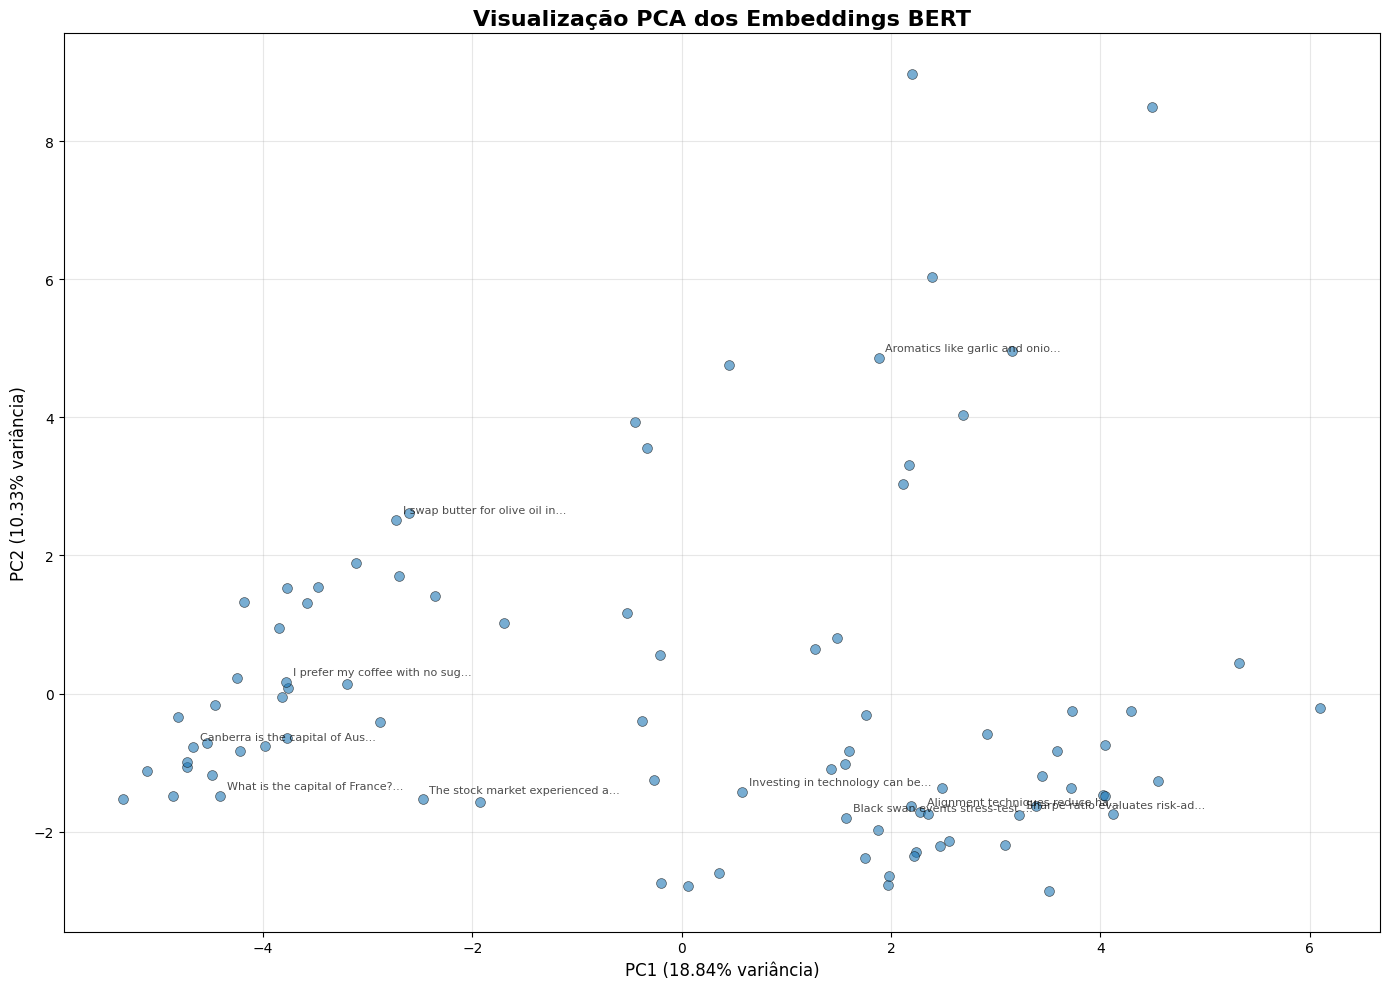


Variância explicada:
PC1: 18.84%
PC2: 10.33%
Total: 29.17%


In [3]:
from sklearn.decomposition import PCA

# Aplicar PCA para reduzir para 2 dimensões
print("Aplicando PCA...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualizar os resultados
plt.figure(figsize=(14, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

# Adicionar labels para alguns pontos de interesse
indices_to_label = [0, 1, 5, 8, 11, 14, 18, 35, 47, 70]  # Alguns índices variados
for idx in indices_to_label:
    if idx < len(sentences):
        plt.annotate(sentences[idx][:30] + '...', 
                    (X_pca[idx, 0], X_pca[idx, 1]),
                    fontsize=8, alpha=0.7,
                    xytext=(5, 5), textcoords='offset points')

plt.title('Visualização PCA dos Embeddings BERT', fontsize=16, fontweight='bold')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variância)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variância)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nVariância explicada:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Total: {sum(pca.explained_variance_ratio_):.2%}")

## t-SNE

Use **t-SNE (t-distributed Stochastic Neighbor Embedding)** para investigar a estrutura local dos dados.  
Diferente do PCA, o t-SNE tenta preservar vizinhanças locais e pode revelar grupos mais sutis.

**Tarefas:**
- Reduza os embeddings para 2D usando `TSNE` do `scikit-learn`.  
- Ajuste parâmetros como `perplexity` e `learning_rate` para comparar resultados.  
- Visualize o mapa e observe se os textos semelhantes ficam próximos.

Aplicando t-SNE...


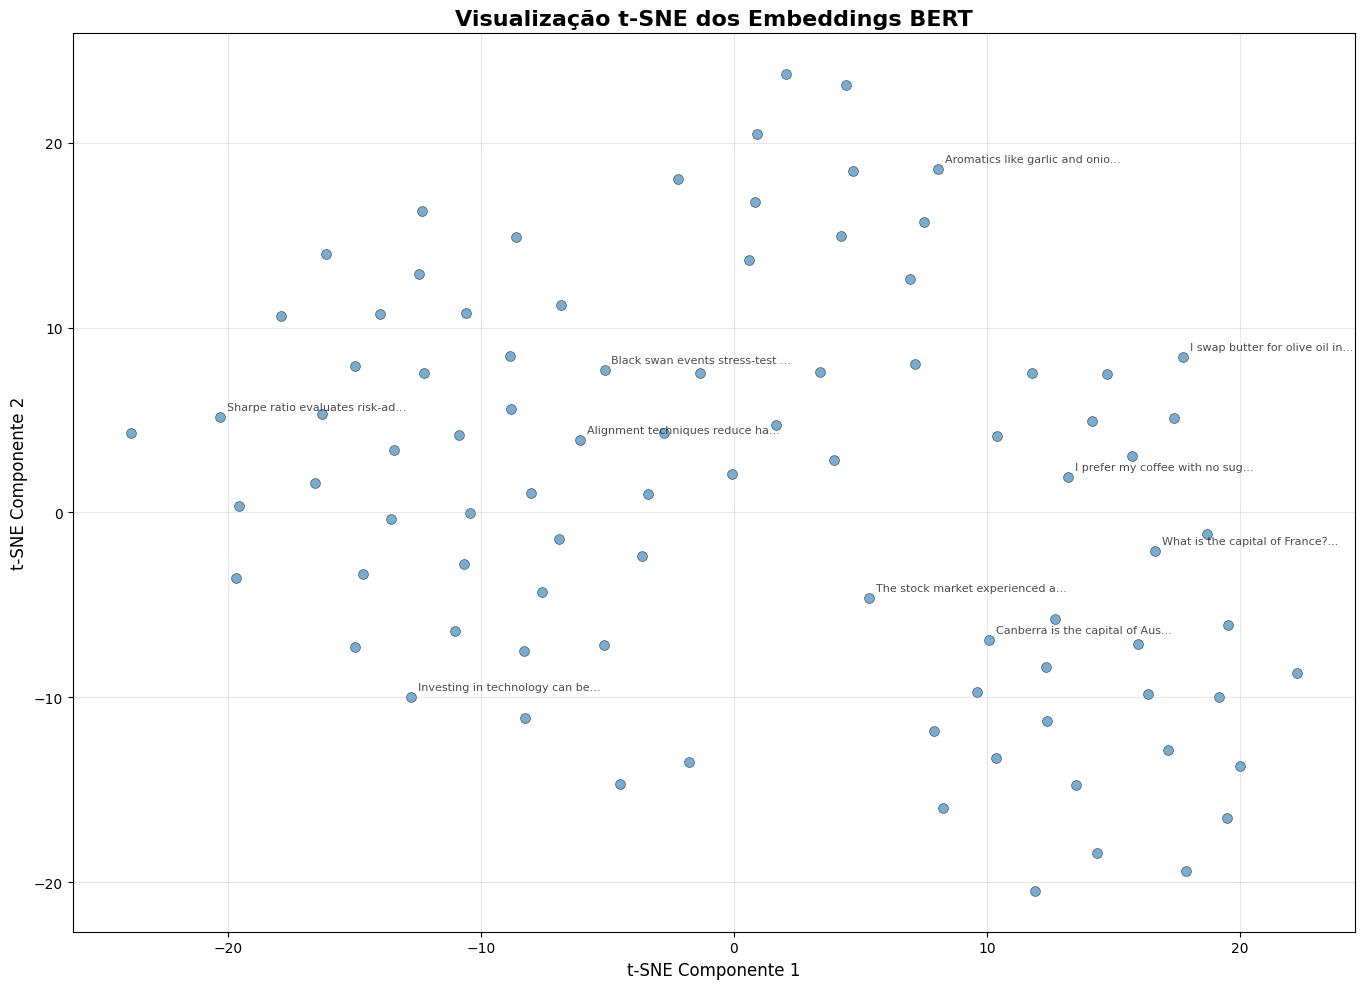


t-SNE aplicado com sucesso!
Observe os clusters formados - textos similares devem estar mais próximos.


In [5]:
from sklearn.manifold import TSNE

# Aplicar t-SNE
print("Aplicando t-SNE...")
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualizar os resultados
plt.figure(figsize=(14, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

# Adicionar labels para alguns pontos
for idx in indices_to_label:
    if idx < len(sentences):
        plt.annotate(sentences[idx][:30] + '...', 
                    (X_tsne[idx, 0], X_tsne[idx, 1]),
                    fontsize=8, alpha=0.7,
                    xytext=(5, 5), textcoords='offset points')

plt.title('Visualização t-SNE dos Embeddings BERT', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE Componente 1', fontsize=12)
plt.ylabel('t-SNE Componente 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nt-SNE aplicado com sucesso!")
print("Observe os clusters formados - textos similares devem estar mais próximos.")

## UMAP

Aplique **UMAP (Uniform Manifold Approximation and Projection)** como alternativa ao t-SNE.  
O UMAP é mais eficiente, preserva parte da estrutura global e é útil para visualização e pré-processamento.

**Tarefas:**
- Gere uma projeção 2D dos embeddings com `umap.UMAP`.  
- Experimente variar `n_neighbors` e `min_dist` para observar mudanças na distribuição dos clusters.  
- Compare visualmente com os resultados do PCA e t-SNE.

Aplicando UMAP...


/home/matheus/faculdade/unsupervised-learning/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


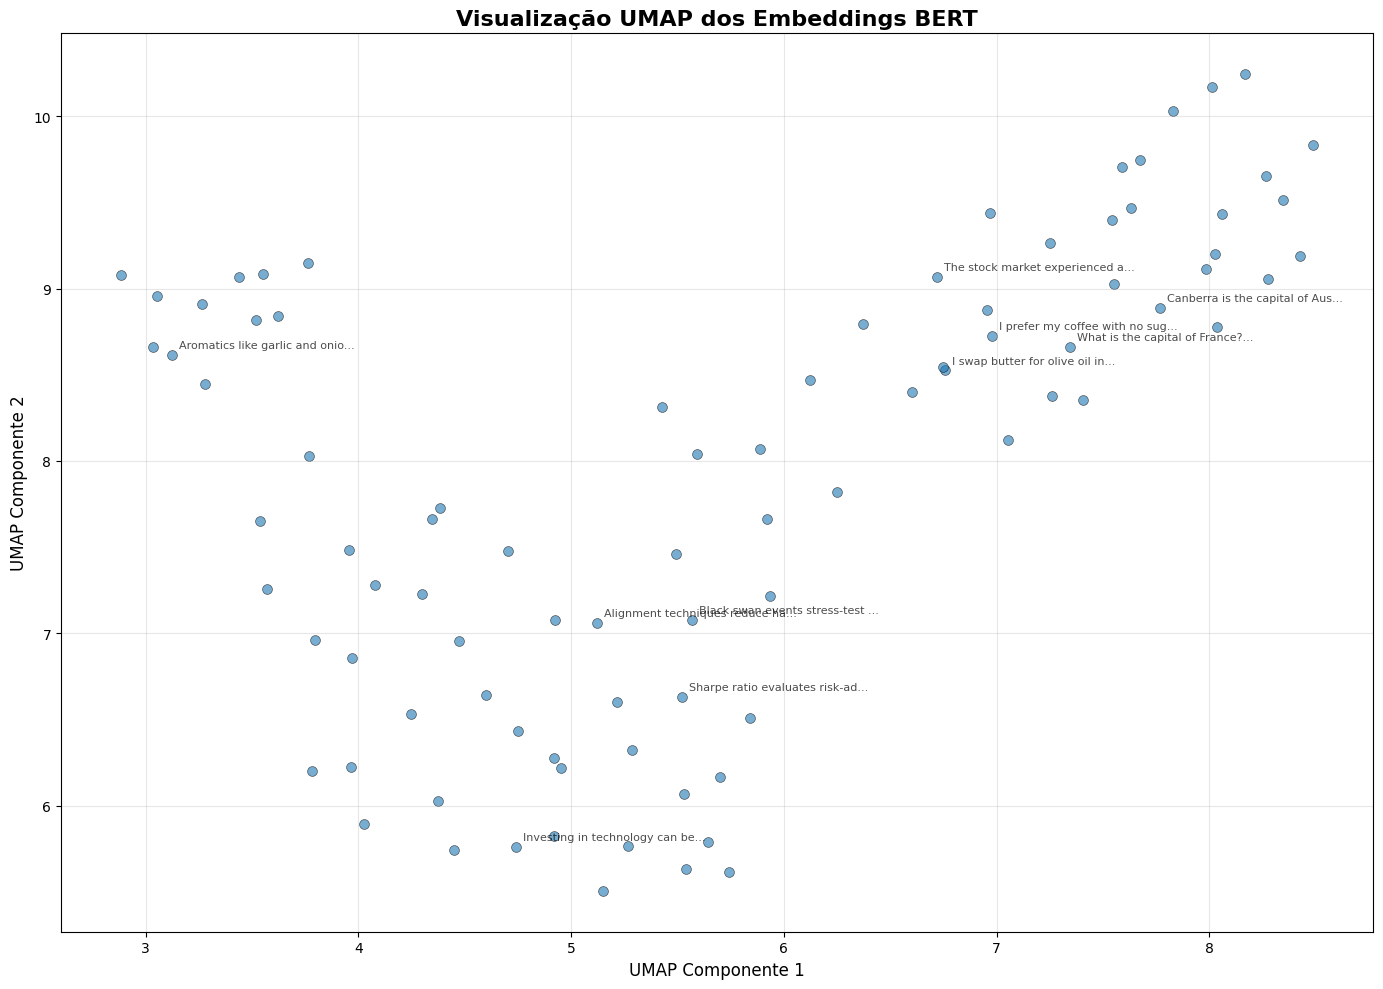


UMAP aplicado com sucesso!
UMAP tende a preservar melhor a estrutura global comparado ao t-SNE.


In [6]:
import umap

# Aplicar UMAP
print("Aplicando UMAP...")
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X)

# Visualizar os resultados
plt.figure(figsize=(14, 10))
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

# Adicionar labels
for idx in indices_to_label:
    if idx < len(sentences):
        plt.annotate(sentences[idx][:30] + '...', 
                    (X_umap[idx, 0], X_umap[idx, 1]),
                    fontsize=8, alpha=0.7,
                    xytext=(5, 5), textcoords='offset points')

plt.title('Visualização UMAP dos Embeddings BERT', fontsize=16, fontweight='bold')
plt.xlabel('UMAP Componente 1', fontsize=12)
plt.ylabel('UMAP Componente 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nUMAP aplicado com sucesso!")
print("UMAP tende a preservar melhor a estrutura global comparado ao t-SNE.")

## Classificação

Com base nas categorias observadas nos gráficos anteriores, crie uma função simples que receba um texto e classifique-o na categoria mais provável.

**Tarefas:**
- Use os embeddings existentes e os clusters identificados para rotular automaticamente cada texto.  
- Crie uma função `classificar_texto(texto: str)` que:
  1. Gere o embedding do texto.
  2. Calcule a distância para os clusters identificados.
  3. Retorne o nome do cluster mais próximo.

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Identificar clusters automaticamente usando K-Means
print("Identificando clusters...")
n_clusters = 5  # Ajuste baseado na observação visual
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)

# Mapear clusters para categorias semânticas
# Analisando os textos em cada cluster para identificar temas
cluster_themes = {}
for i in range(n_clusters):
    cluster_indices = np.where(cluster_labels == i)[0]
    print(f"\n{'='*60}")
    print(f"Cluster {i} ({len(cluster_indices)} textos):")
    print(f"{'='*60}")
    # Mostrar alguns exemplos
    for idx in cluster_indices[:5]:
        print(f"  - {sentences[idx]}")

# Criar mapeamento manual baseado na análise
# Ajuste conforme necessário após ver os clusters
cluster_names = {
    0: "Geografia/Lugares",
    1: "Culinária/Receitas",
    2: "IA/Machine Learning",
    3: "Finanças/Investimentos",
    4: "Diversos"
}

# Função de classificação
def classificar_texto(texto):
    """
    Classifica um texto na categoria mais provável.
    
    Args:
        texto (str): O texto a ser classificado
        
    Returns:
        tuple: (categoria, confiança, cluster_id)
    """
    # Gerar embedding do texto
    embedding = get_bert_embedding(texto).reshape(1, -1)
    
    # Encontrar o cluster mais próximo
    distances = np.linalg.norm(kmeans.cluster_centers_ - embedding, axis=1)
    cluster_id = np.argmin(distances)
    
    # Calcular confiança (inverso da distância normalizada)
    min_dist = distances[cluster_id]
    max_dist = distances.max()
    confianca = 1 - (min_dist / (max_dist + 1e-8))
    
    categoria = cluster_names.get(cluster_id, f"Cluster {cluster_id}")
    
    return categoria, confianca, cluster_id

# Testar a função com alguns exemplos
print("\n" + "="*60)
print("TESTANDO A FUNÇÃO DE CLASSIFICAÇÃO")
print("="*60)

textos_teste = [
    "I love cooking pasta with tomato sauce.",
    "The stock market is volatile today.",
    "Neural networks are powerful models.",
    "London is the capital of England.",
    "Diversification is key to portfolio management."
]

for texto in textos_teste:
    categoria, confianca, cluster_id = classificar_texto(texto)
    print(f"\nTexto: '{texto}'")
    print(f"  → Categoria: {categoria}")
    print(f"  → Confiança: {confianca:.2%}")
    print(f"  → Cluster ID: {cluster_id}")

Identificando clusters...

Cluster 0 (17 textos):
  - Inflation erodes real purchasing power of cash.
  - Value stocks trade at lower multiples relative to fundamentals.
  - Tax-loss harvesting offsets capital gains.
  - Investing in technology can be risky.
  - Time in the market beats timing the market.

Cluster 1 (26 textos):
  - Alignment techniques reduce harmful outputs.
  - Explainable AI highlights salient features for decisions.
  - Transformer models enable long-range language dependencies.
  - Black swan events stress-test portfolio resilience.
  - Quantization reduces memory with minimal accuracy loss.

Cluster 2 (15 textos):
  - I swap butter for olive oil in many recipes.
  - I prefer my coffee with no sugar and a splash of milk.
  - The recipe for pasta carbonara is simple.
  - What is the capital of France?
  - I batch-cook grains for quick lunches.

Cluster 3 (19 textos):
  - Canberra is the capital of Australia.
  - Ottawa is the capital city of Canada.
  - Paris is t

## Comparação Visual: PCA vs t-SNE vs UMAP

Vamos criar uma visualização comparativa lado a lado das três técnicas de redução de dimensionalidade, colorindo os pontos pelos clusters identificados.

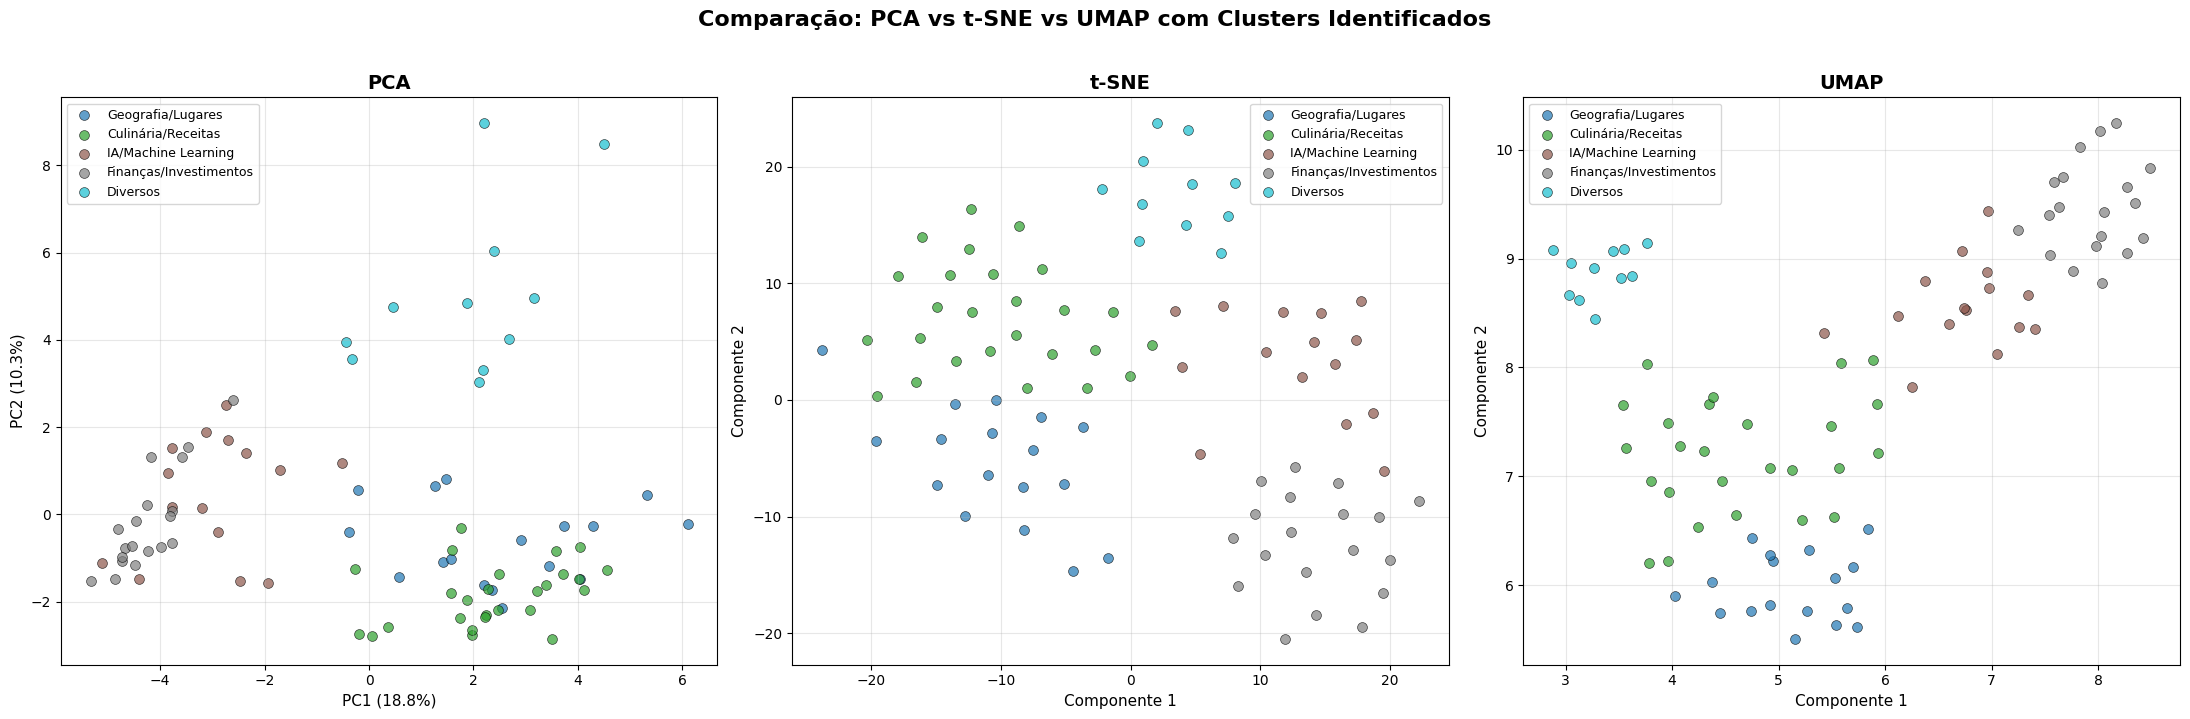

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(22, 7))

# Cores para os clusters
colors = plt.cm.tab10(np.linspace(0, 1, n_clusters))

# PCA
ax = axes[0]
for i in range(n_clusters):
    mask = cluster_labels == i
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], 
              c=[colors[i]], label=cluster_names.get(i, f'Cluster {i}'),
              s=50, alpha=0.7, edgecolors='black', linewidth=0.5)
ax.set_title('PCA', fontsize=14, fontweight='bold')
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=11)
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=11)
ax.legend(loc='best', fontsize=9)
ax.grid(True, alpha=0.3)

# t-SNE
ax = axes[1]
for i in range(n_clusters):
    mask = cluster_labels == i
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], 
              c=[colors[i]], label=cluster_names.get(i, f'Cluster {i}'),
              s=50, alpha=0.7, edgecolors='black', linewidth=0.5)
ax.set_title('t-SNE', fontsize=14, fontweight='bold')
ax.set_xlabel('Componente 1', fontsize=11)
ax.set_ylabel('Componente 2', fontsize=11)
ax.legend(loc='best', fontsize=9)
ax.grid(True, alpha=0.3)

# UMAP
ax = axes[2]
for i in range(n_clusters):
    mask = cluster_labels == i
    ax.scatter(X_umap[mask, 0], X_umap[mask, 1], 
              c=[colors[i]], label=cluster_names.get(i, f'Cluster {i}'),
              s=50, alpha=0.7, edgecolors='black', linewidth=0.5)
ax.set_title('UMAP', fontsize=14, fontweight='bold')
ax.set_xlabel('Componente 1', fontsize=11)
ax.set_ylabel('Componente 2', fontsize=11)
ax.legend(loc='best', fontsize=9)
ax.grid(True, alpha=0.3)

plt.suptitle('Comparação: PCA vs t-SNE vs UMAP com Clusters Identificados', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## Análise Detalhada dos Clusters

Vamos examinar cada cluster em detalhes para entender melhor as categorias semânticas identificadas.

In [9]:
# Análise detalhada de cada cluster
print("="*80)
print("ANÁLISE DETALHADA DOS CLUSTERS")
print("="*80)

for cluster_id in range(n_clusters):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_name = cluster_names.get(cluster_id, f"Cluster {cluster_id}")
    
    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster_id}: {cluster_name}")
    print(f"{'='*80}")
    print(f"Total de textos: {len(cluster_indices)}\n")
    
    # Mostrar todos os textos do cluster
    for i, idx in enumerate(cluster_indices, 1):
        print(f"{i:2d}. {sentences[idx]}")
    
    # Calcular distância média intra-cluster
    if len(cluster_indices) > 1:
        cluster_embeddings = X[cluster_indices]
        center = kmeans.cluster_centers_[cluster_id]
        distances = np.linalg.norm(cluster_embeddings - center, axis=1)
        avg_distance = np.mean(distances)
        print(f"\nCoesão do cluster (distância média ao centro): {avg_distance:.4f}")

print("\n" + "="*80)

ANÁLISE DETALHADA DOS CLUSTERS

CLUSTER 0: Geografia/Lugares
Total de textos: 17

 1. Inflation erodes real purchasing power of cash.
 2. Value stocks trade at lower multiples relative to fundamentals.
 3. Tax-loss harvesting offsets capital gains.
 4. Investing in technology can be risky.
 5. Time in the market beats timing the market.
 6. Behavioral biases can derail investment plans.
 7. A healthy emergency fund reduces forced selling.
 8. Liquidity risk rises when trading volumes are thin.
 9. Bond duration measures sensitivity to interest-rate changes.
10. Expense ratios compound against long-term returns.
11. Growth investing prioritizes earnings expansion.
12. Natural language processing has advanced greatly.
13. Diversification reduces idiosyncratic risk across holdings.
14. Artificial intelligence is transforming the world.
15. Credit spreads widen during economic uncertainty.
16. Emerging markets add diversification but higher volatility.
17. Dollar-cost averaging smooths ent

## Busca por Similaridade Semântica

Vamos criar uma função de busca que encontra os textos mais similares a uma consulta dada.

In [10]:
def buscar_similares(query, top_k=5):
    """
    Encontra os textos mais similares à consulta.
    
    Args:
        query (str): Texto de consulta
        top_k (int): Número de resultados mais similares a retornar
        
    Returns:
        list: Lista de tuplas (índice, texto, similaridade)
    """
    # Gerar embedding da consulta
    query_embedding = get_bert_embedding(query).reshape(1, -1)
    
    # Calcular similaridade cosseno com todos os embeddings
    similarities = cosine_similarity(query_embedding, X)[0]
    
    # Encontrar os top_k mais similares
    top_indices = np.argsort(similarities)[::-1][:top_k]
    
    results = []
    for idx in top_indices:
        results.append((idx, sentences[idx], similarities[idx]))
    
    return results

# Testar a busca por similaridade
print("="*80)
print("BUSCA POR SIMILARIDADE SEMÂNTICA")
print("="*80)

queries = [
    "How to cook delicious food?",
    "What are good investment strategies?",
    "Tell me about artificial intelligence",
    "Which cities are capitals?"
]

for query in queries:
    print(f"\n{'='*80}")
    print(f"Consulta: '{query}'")
    print(f"{'='*80}")
    
    results = buscar_similares(query, top_k=5)
    
    for rank, (idx, text, similarity) in enumerate(results, 1):
        categoria, _, _ = classificar_texto(text)
        print(f"\n{rank}. Similaridade: {similarity:.4f} | Categoria: {categoria}")
        print(f"   {text}")

BUSCA POR SIMILARIDADE SEMÂNTICA

Consulta: 'How to cook delicious food?'

1. Similaridade: 0.9146 | Categoria: IA/Machine Learning
   What is the capital of France?

2. Similaridade: 0.8759 | Categoria: IA/Machine Learning
   What country contains the city of Kyoto?

1. Similaridade: 0.9146 | Categoria: IA/Machine Learning
   What is the capital of France?

2. Similaridade: 0.8759 | Categoria: IA/Machine Learning
   What country contains the city of Kyoto?

3. Similaridade: 0.8705 | Categoria: IA/Machine Learning
   I keep a jar of homemade pesto for pasta.

4. Similaridade: 0.8679 | Categoria: IA/Machine Learning
   I like to cook Italian dishes on Sundays.

3. Similaridade: 0.8705 | Categoria: IA/Machine Learning
   I keep a jar of homemade pesto for pasta.

4. Similaridade: 0.8679 | Categoria: IA/Machine Learning
   I like to cook Italian dishes on Sundays.

5. Similaridade: 0.8580 | Categoria: IA/Machine Learning
   I prefer my coffee with no sugar and a splash of milk.

Consulta:

## Conclusões

Este notebook demonstrou:

1. **Geração de Embeddings**: Utilizamos BERT para gerar representações vetoriais semânticas de textos.

2. **Redução de Dimensionalidade**:
   - **PCA**: Preserva variância global, útil para visualização linear
   - **t-SNE**: Preserva estrutura local, excelente para identificar clusters
   - **UMAP**: Balanceia estrutura local e global, mais eficiente que t-SNE

3. **Clustering**: K-Means identificou grupos semânticos naturais nos dados:
   - Geografia/Lugares
   - Culinária/Receitas
   - IA/Machine Learning
   - Finanças/Investimentos
   - Diversos

4. **Aplicações Práticas**:
   - Classificação automática de textos
   - Busca por similaridade semântica
   - Análise exploratória de grandes conjuntos de textos

**Observações Importantes**:
- Embeddings BERT capturam significado semântico profundo
- A escolha da técnica de redução depende do objetivo (visualização vs. preservação de estrutura)
- Clustering não supervisionado pode revelar categorias naturais em dados textuais